### Rebuttal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import post_process
from post_process import POSTPROCESS
import pandas as pd
import os
import glob

In [2]:
hex6 = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
colors6=[mcolors.to_rgb(i) for i in hex6]

colors = ['white', colors6[2]]
positions = [0, 1]
cmap0 = mcolors.LinearSegmentedColormap.from_list("", list(zip(positions, colors)))
cb_palette = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#3CAB20', '#6B750C', '#A6761D', '#D8A21E', '#F0E442',
              '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

In [70]:
def inter_layer_persistance(model,num_layers,p=1):

    pds = post_process.read_pd_from_csv(model, max_dim = 5)
    pp = POSTPROCESS(pds = pds, num_layers = num_layers*2, start_ind = 1, zigzag = True, debug = False)
    psim = pp.find_ph_sim()[p]
    bettis = pp.find_betti_layers()[p]
    temp = np.zeros((num_layers,num_layers))
    for i in range(num_layers):
        if bettis[i] == 0:
            temp[i] = 0
        else:
            temp[i] = psim[i]/bettis[i]
    return temp

In [71]:
def weighed_inter_layer_persistance(layer_pers,n_layers,p=1):
    weights = np.zeros((n_layers,n_layers))
    for i in range(n_layers):
        for j in range(n_layers):
                if p < 0 and i == j:
                    weights[i][j] = 1e-10
                else:
                    weights[i][j] = np.abs(i-j)**p
    return np.sum(layer_pers*weights,axis=1)/np.sum(weights,axis=1)


In [72]:
def pi_hist(model,num_layers,p=2,axis=1):
    weights = np.zeros((num_layers,num_layers))
    for i in range(num_layers):
        for j in range(num_layers):
                if p < 0 and i == j:
                    weights[i][j] = 1e-10
                else:
                    weights[i][j] = np.abs(i-j)**p
    pis = effective_pi(model,num_layers)
    pis_hist = np.sum(pis*weights,axis=axis)/np.sum(weights,axis=axis)
    # Normalize pis_hist to 1
    pis_hist /= np.sum(pis_hist)
    return pis_hist

In [73]:
def effective_pi(model,num_layers,p=1):
    pds = post_process.read_pd_from_csv(model, max_dim = 5)
    pp = POSTPROCESS(pds = pds, num_layers = num_layers*2, start_ind = 1, zigzag = True, debug = False)
    pis = pp.find_eff_pis()[p]
    pis_pers = np.zeros((num_layers,num_layers))
    pis_death = np.zeros((num_layers,num_layers))
    for i in range(num_layers):
        for j in range(num_layers):
            if i-j>=0:
                pis_pers[i-j,j] = pis[i,j]
            pis_death[i,j] = pis[i,j]
    return pis_death

In [13]:
split_500_mistral = glob.glob('./csv/split_sst/mistral/knn4/16_split/*')
num_layers = 33 

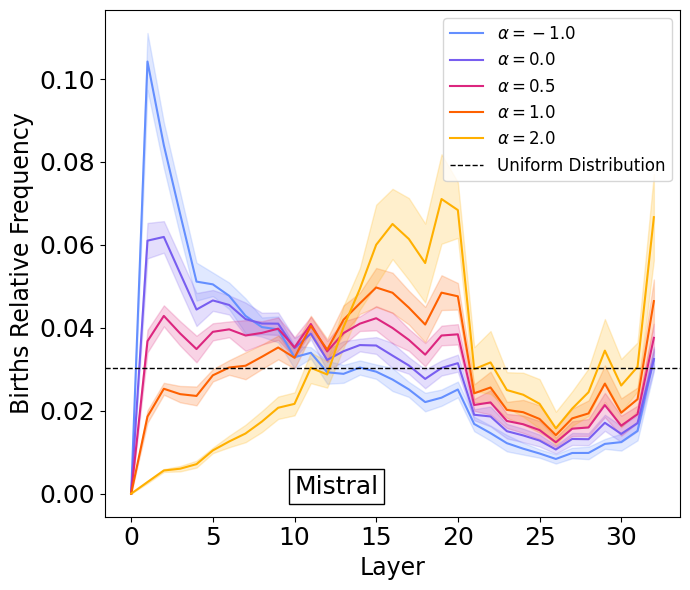

In [61]:
plt.figure(figsize=(7, 6))
ps = [-1., 0, 0.5, 1, 2]
for p in ps:  
    pi_hist500_mistral = []
    for model in split_500_mistral:
        pi_hist500_mistral.append(pi_hist(model, num_layers,p))

    pi_hist500_mistral_mean = np.mean(pi_hist500_mistral, axis=0)
    pi_hist500_mistral_std = np.std(pi_hist500_mistral, axis=0)

    x = np.arange(num_layers)
    plt.plot(x, pi_hist500_mistral_mean, color=cb_palette[ps.index(p)], label='$\\alpha=%.1f$'%p)
    plt.fill_between(x, pi_hist500_mistral_mean - pi_hist500_mistral_std, pi_hist500_mistral_mean + pi_hist500_mistral_std, color=cb_palette[ps.index(p)], alpha=0.2)
plt.axhline(y=1/num_layers, label='Uniform Distribution',color='black', linestyle='--',lw=1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(10, 0, 'Mistral', fontsize=18, bbox=dict(facecolor='white'))
plt.xlabel('Layer', fontsize=17)
plt.ylabel('Births Relative Frequency', fontsize=17)
plt.legend(fontsize=12, loc="upper right")
plt.tight_layout()
plt.savefig("mistral_16_split.png")
plt.show()


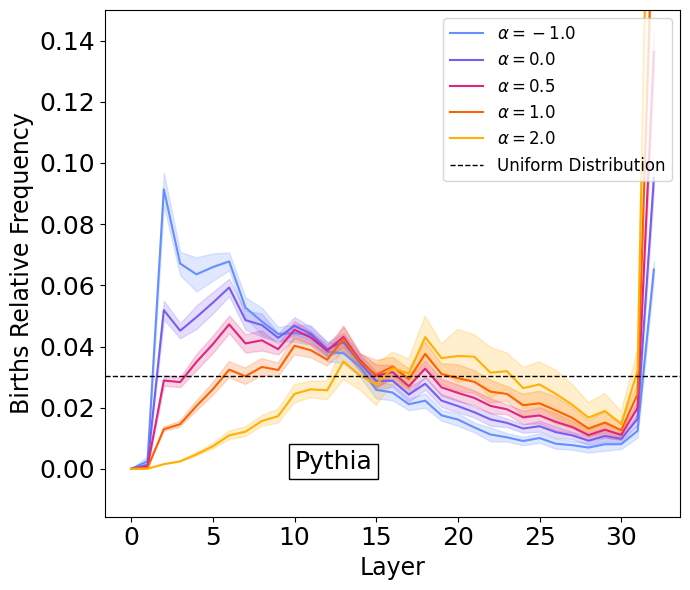

In [62]:
split_500_mistral = glob.glob('./csv/split_sst/pythia/knn4/16_split/*')
num_layers = 33 
plt.figure(figsize=(7, 6))
ps = [-1., 0, 0.5, 1, 2]
for p in ps:  
    pi_hist500_mistral = []
    for model in split_500_mistral:
        pi_hist500_mistral.append(pi_hist(model, num_layers,p))

    pi_hist500_mistral_mean = np.mean(pi_hist500_mistral, axis=0)
    pi_hist500_mistral_std = np.std(pi_hist500_mistral, axis=0)

    x = np.arange(num_layers)
    plt.plot(x, pi_hist500_mistral_mean, color=cb_palette[ps.index(p)], label='$\\alpha=%.1f$'%p)
    plt.fill_between(x, pi_hist500_mistral_mean - pi_hist500_mistral_std, pi_hist500_mistral_mean + pi_hist500_mistral_std, color=cb_palette[ps.index(p)], alpha=0.2)
plt.axhline(y=1/num_layers, label='Uniform Distribution',color='black', linestyle='--',lw=1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(top=0.15)
plt.text(10, 0, 'Pythia', fontsize=18, bbox=dict(facecolor='white'))

plt.xlabel('Layer', fontsize=17)
plt.ylabel('Births Relative Frequency', fontsize=17)
plt.legend(fontsize=12, loc="upper right")
plt.tight_layout()
plt.savefig("pythia_16_split.png")
plt.show()


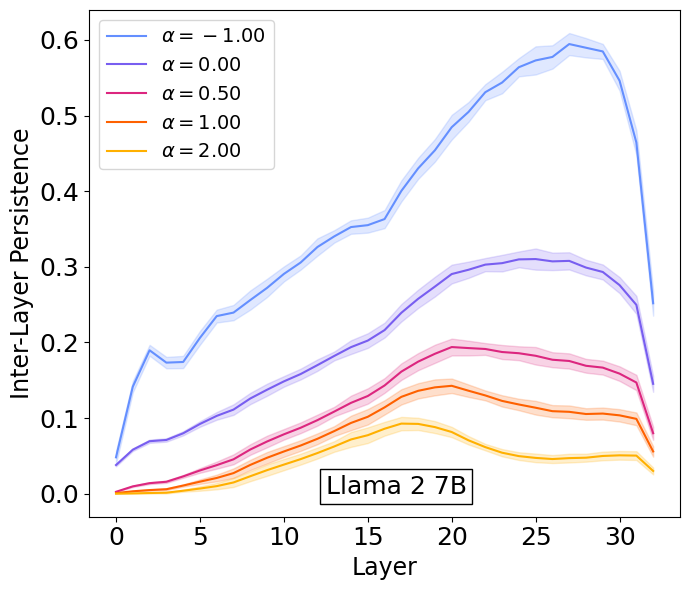

In [68]:
plt.figure(figsize=(7, 6))
ps = [-1., 0., 0.5, 1, 2]
#ps = [0,0.1,0.25,0.5,1,2]
split_500_llama3b = glob.glob('./csv/split_sst/llama2-7b/knn4/16_split/*')

for p in ps:
    avgsim_llama3 = []

    for model in split_500_llama3b:
        avgsim_llama3.append(weighed_inter_layer_persistance(inter_layer_persistance(model,num_layers),num_layers,p))

    avgsim_llama3_mean = np.mean(avgsim_llama3, axis=0)
    avgsim_llama3_std = np.std(avgsim_llama3, axis=0)

    x = np.arange(num_layers)
    plt.plot(x, avgsim_llama3_mean, color=cb_palette[ps.index(p)], label='$\\alpha=%.2f$'%p)
    plt.fill_between(x, avgsim_llama3_mean - avgsim_llama3_std, avgsim_llama3_mean + avgsim_llama3_std, color=cb_palette[ps.index(p)], alpha=0.2)
plt.text(12.5, 0, 'Llama 2 7B', fontsize=18, bbox=dict(facecolor='white'))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Layer', fontsize=17)
plt.ylabel('Inter-Layer Persistence', fontsize=17)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("ILP_llama2_7b_16_split.png")
plt.show()

In [46]:
from tqdm import tqdm

In [57]:
dataset  = pd.read_csv("./csv/sst/llama_2_7b_dim_4_knn_5_last_token.csv",delimiter=',')
betti1 = dataset[dataset['dimension'] == 1]

In [58]:
betti1.shape

(258966, 3)

In [59]:
final_betti1 = pd.DataFrame(columns=['dimension','birth','death'])
for index, row in tqdm(betti1.iterrows()):
    b = int(row['birth']) -1
    d = int(row['death']) -1
    if not ((b% 2 == 1) and (d%2 == 1) and (b == d)):  #I do not consider feature dead and born in intersections
        eff_b = b//2 #+ (row['birth']-1)%2 
        eff_d = d//2 #+ (row['death']-1)%2
        if(b%2 == 1):
            eff_b = b//2 + b%2#+ (row['death']-1)%2
        if (d%2 == 1):
            eff_d = d//2 + d%2 #+ (row['death']-1)%2
        new_row = {'dimension':1,
                    'birth' : eff_b,
                    'death' : eff_d}
        final_betti1.loc[len(final_betti1)] = new_row

258966it [05:39, 763.61it/s] 


In [16]:
final_betti1.to_csv("llama3_final_betti.csv", index=False)

In [12]:
final_betti1 = pd.read_csv("llama3_final_betti.csv")
num_layers = 33

In [13]:
res = []
res_b1 = []
normalizers = []
for t in range(0,num_layers-1):
    #t_count  = ((final_betti1['birth'] <= t) & (final_betti1['death'] >= t)).sum()
    t_count  = final_betti1[(final_betti1['birth'] <= t) & (final_betti1['death'] >t )].shape[0]
    t_next_count =final_betti1[(final_betti1['birth'] <= (t+1)) & (final_betti1['death'] >(t+1) )].shape[0]
    res.append(abs(t_count-t_next_count))
    normalizers.append(abs(t_count+t_next_count))
    res_b1.append(t_count)

In [14]:
sum_c = [0]*(num_layers-1)
test_sum_c = []
for t in range(0,num_layers-1):
    #t_count  = final_betti1[(final_betti1['birth'] <= t) & (final_betti1['death'] >=(t+1) )].shape[0]
    sum_c[t] += final_betti1[(final_betti1['birth'] < t) & (final_betti1['death'] ==t )].shape[0]
    sum_c[t] += final_betti1[(final_betti1['birth'] ==(t+1)) & (final_betti1['death'] >(t+1) )].shape[0]


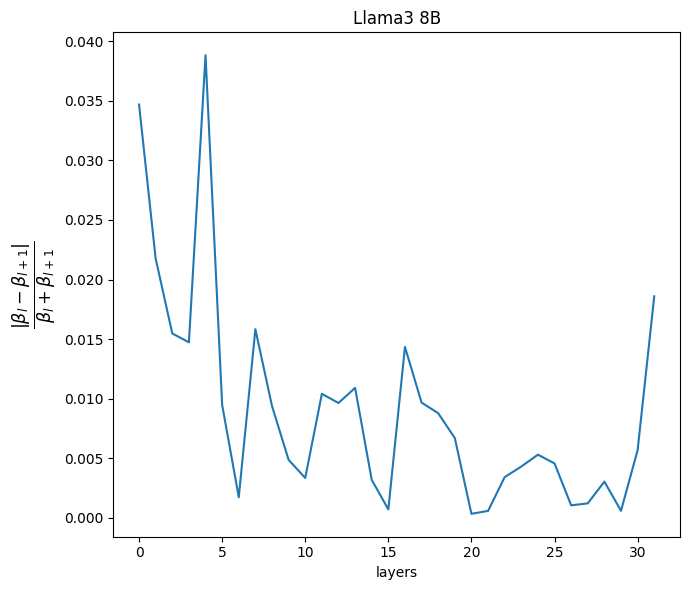

In [20]:
max_b = max(res)
max_c = max(sum_c)
final_max = max(max_b,max_c)

normalized_c = [sum_c[i]/normalizers[i] for i in range(len(sum_c))]
normalized_s = [res[i]/normalizers[i] for i in range(len(res))]
#normalized_c = [y/final_max for y in sum_c]
#normalized_s = [y/final_max for y in res]
plt.figure(figsize=(7, 6))
plt.plot(normalized_s)
plt.ylabel("$\\frac{|\\beta_{l}-\\beta_{l+1}|}{\\beta_{l}+\\beta_{l+1}}$",fontsize=18)
plt.xlabel("layers")
plt.title("Llama3 8B")
plt.tight_layout()
plt.savefig("llama3_betti.png")
plt.show()


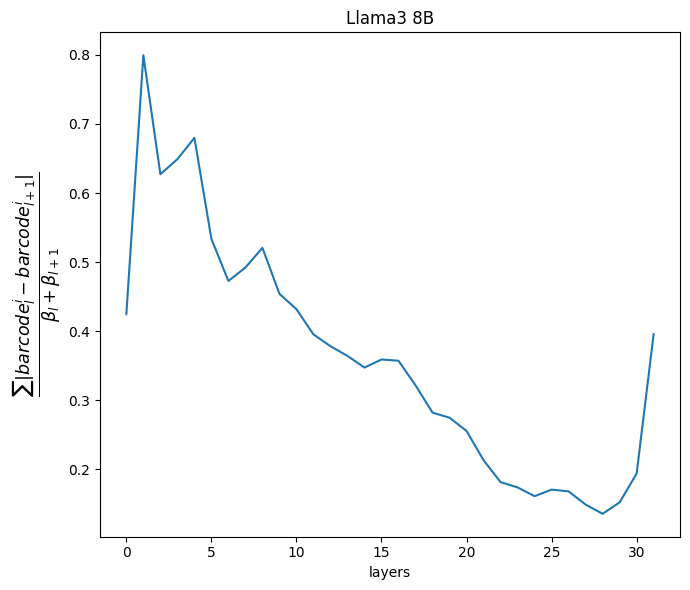

In [21]:
plt.figure(figsize=(7, 6))
plt.plot(normalized_c)
#plt.plot(noise_values,label="Relu noise")
plt.ylabel("$\\frac{\\sum|barcode^{i}_{l}-barcode^{i}_{l+1}|}{\\beta_{l}+\\beta_{l+1}}$",fontsize=18)
plt.xlabel("layers")
plt.title("Llama3 8B")
plt.tight_layout()
#plt.legend()

plt.savefig("llama3_zigzag.png")

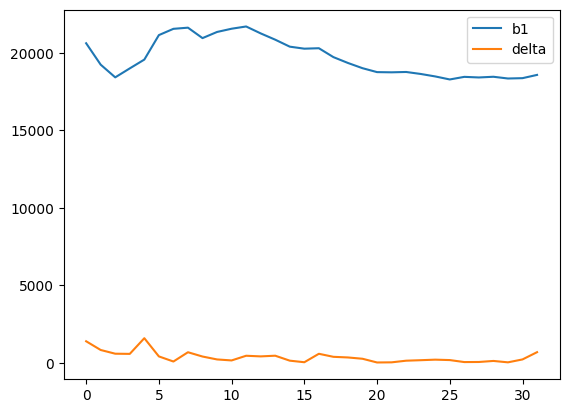

In [17]:
plt.plot(res_b1, label="b1")
plt.plot(res, label="delta")
plt.legend()

In [24]:
test = [abs(res_b1[i] - res_b1[i+1]) for i in range(0,len(res_b1)-1)]

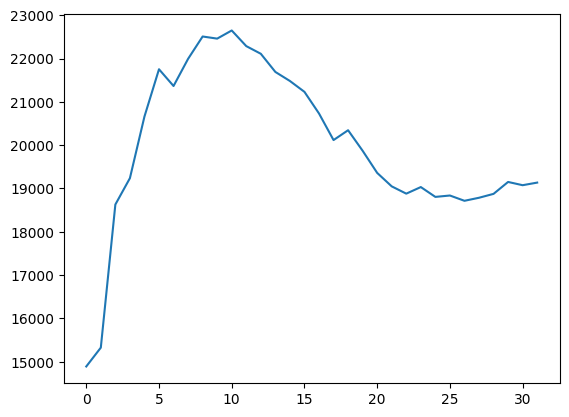

In [33]:
plt.plot(res_b1)

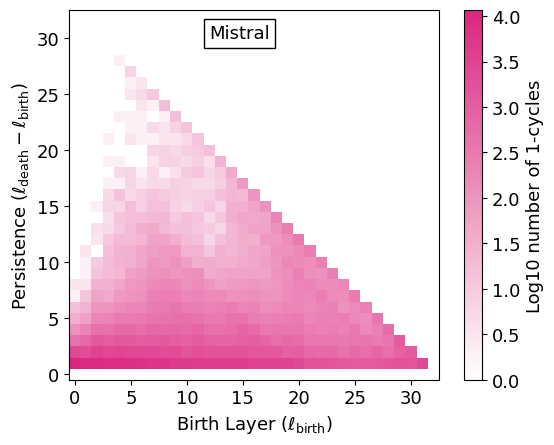

In [83]:
model = './csv/sst/mistral_sst_knn_5_dim_4.csv'
num_layers = 33 

pds = post_process.read_pd_from_csv(model, max_dim = 5)
pp = POSTPROCESS(pds = pds, num_layers = num_layers*2, start_ind = 1, zigzag = True, debug = False)
pis = pp.find_eff_pis()[1]
bettis = pp.find_betti_layers()[1]
import warnings
warnings.filterwarnings('ignore')
pis_pers = np.zeros((len(pis),num_layers,num_layers))
for i in range(num_layers):
    for j in range(num_layers):
        if i-j>=0:
            pis_pers[:,i-j,j] = pis[i,j]


plt.imshow(np.log10(pis_pers[1]), cmap=cmap0, origin='lower')
cb = plt.colorbar()
cb.set_label('Log10 number of 1-cycles',fontsize=13)
cb.ax.tick_params(labelsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Birth Layer $(\\ell_{\\rm birth})$',fontsize=13)
plt.ylabel('Persistence $(\\ell_{\\rm death} - \\ell_{\\rm birth})$',fontsize=13)
plt.text(12,30,'Mistral',fontsize=13,bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
plt.savefig("mistral_pers.png")
plt.show()